# Política no Twitter

Projeto da disciplina de Introdução a Ciência de Dados.

## Configuração

+ Instale e configure sua versão do Anaconda. Orientações disponíveis no próprio [site](https://docs.anaconda.com/anaconda/install/) do produto

+ Ative o conda, crie e utilize um novo ambiente

```shell
source path_to_conda/activate
conda env create -f environment.yml
conda activate ptwitter
```

+ Inicie o ```jupyter-lab```.


## Datasets

In [47]:
import os
import pandas as pd

dfs = [] 
to_be_dropped = ['id', 'display_text_range', 'entities', 'source', 
                 'in_reply_to_status_id', 'in_reply_to_status_id_str', 
                 'in_reply_to_user_id', 'in_reply_to_user_id_str', 
                 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
                 'contributors', 'is_quote_status', 'lang', 'extended_entities',
                 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink']

with os.scandir('dados') as lsit:
    fit = (f for f in lsit if f.is_file())
    for f in fit:
        profile = f.name.split('.')[0]
        df = pd.read_json(f.path).drop(columns=to_be_dropped)
        df['tweet_len'] = df['full_text'].apply(len)
        df['word_count'] = df['full_text'].apply(lambda x: len(str(x).split()))
        df['profile'] = profile
        dfs.append(df)

tweets_df = pd.concat(dfs)

lula_df = tweets_df[tweets_df['profile'] == 'lulaoficial']
bolsonaro_df = tweets_df[tweets_df['profile'] == 'jairbolsonaro']

In [48]:
import pt_core_news_sm
from collections import Counter

custom_stop_words = ['a', 'e', 'o', 'n', 'd', 'A', 'E', 'O', 'N', 'D']
words = []
nlp = pt_core_news_sm.load()

for sw in custom_stop_words:
    nlp.vocab[sw].is_stop = True

docs = list(nlp.pipe(lula_df['full_text'].str.replace(r'\n', '').to_numpy()))

words = [token.text.lower() for doc in docs for token in doc if  not token.is_stop and not token.is_punct and not token.like_url]

words_freq = Counter(words)

print(words_freq.most_common(15))

[('lula', 5293), ('país', 1714), ('brasil', 1482), ('lulapelobrasil', 1141), ('presidente', 929), ('gente', 926), ('pra', 842), ('@haddad_fernando', 688), ('governo', 656), ('pt', 634), ('anos', 633), ('hoje', 613), ('vivo', 600), ('dia', 593), ('ricardo', 581)]


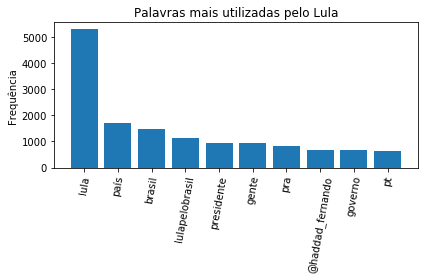

In [64]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
labels, data = zip(*words_freq.most_common(10))

x = np.arange(len(labels))  # the label locations
# width = 0.6  # the width of the bars

# rects = ax.bar(x, list(data), width)
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequência')
ax.set_title('Palavras mais utilizadas pelo Lula')
# ax.set_xticks(x)
# ax.set_xticklabels(list(labels))

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects)

plt.bar(x, list(data))
plt.xticks(x, labels, rotation=80)
fig.tight_layout()
plt.show()